
```
Nama       : Tiara Fitra Ramadhani Siregar
Nim        : 24060121120008
Dataset    : Rice Dataset Cammeo and Osmancik
Link       : https://www.kaggle.com/datasets/muratkokludataset/rice-dataset-commeo-and-osmancik
```




#### **1. Load Rice Dataset Cammeo and Osmancik**
Rice Dataset Cammeo and Osmancik yang digunakan pada praktikum ini di upload ke drive karena tidak dapat langsung diakses menggunakan link dari kaggle. Sehingga dilakukan drive mount terlebih dahulu dan datanya dibaca dari drive.

In [2]:
# Mengimpor modul Pandas dengan alias atau singkatan pd
import pandas as pd

In [3]:
# Mengimpor fungsi drive dari modul google.colab
from google.colab import drive

# Memanggil fungsi mount dari objek drive untuk mengaitkan sesi Colab dengan Google Drive
drive.mount('/content/drive')

# Menetapkan sebuah variabel bernama names yang berisi daftar nama-nama kolom yang terdapat pada dataset Rice
names = ['area', 'perimeter', 'major_axis_length', 'minor_axis_length', 'eccentricity', 'convex_area', 'extent', 'class']

# Membaca dataset dari file Excel sesuai dengan path dan datasetnya disimpan dalam variabel dataset2
rice = pd.read_excel('/content/drive/MyDrive/rice_cammeo_and_osmancik/Rice_Cammeo_Osmancik.xlsx')


Mounted at /content/drive


##### **README:**
Untuk mengakses dataset, mohon terlebih dahulu mengupload file yang telah dilampirkan di github ke drive pribadi.

Kemudian ubah path dari file xlsxnya.

Terima kasih.

### **2. Standarisasi Data**
PCA dipengaruhi oleh skala sehingga perlu menskalakan fitur dalam data sebelum menerapkan PCA. digunakan StandardScaler untuk membantu menstandarisasi fitur set data ke dalam skala unit (mean = 0 dan variance = 1) yang merupakan persyaratan untuk performa optimal dari banyak algoritma pembelajaran mesin.

In [11]:
# Mengimpor modul pyplot dari pustaka matplotlib sebagai plt
from matplotlib import pyplot as plt

# Mengimpor kelas StandardScaler dari modul preprocessing dalam pustaka sklearn
from sklearn.preprocessing import StandardScaler

# Mengimpor kelas PCA (Principal Component Analysis) dari modul decomposition dalam pustaka sklearn
from sklearn.decomposition import PCA

In [12]:
# List fitur yang akan digunakan, seperti 'Area', 'Perimeter', dsb.
features = ['Area','Perimeter','Major_Axis_Length','Minor_Axis_Length','Eccentricity','Convex_Area', 'Extent']

# Memisahkan fitur-fitur dari dataframe 'rice' dan menyimpannya dalam variabel 'x'
x = rice.loc[:, features].values
# Memisahkan target (kelas) dari dataframe 'rice' dan menyimpannya dalam variabel 'y'
y = rice.loc[:,['Class']].values
# Penskalaan standar fitur-fitur menggunakan StandardScaler
x = StandardScaler().fit_transform(x)

### **3. Proyeksi PCA ke 2D**

Data asli memiliki 7 kolom (Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Eccentricity, Convex_Area, Extent). Pada bagian ini kode memproyeksikan data asli yang 7 dimensi menjadi 2 dimensi.

In [13]:
# Membuat objek PCA dengan 2 komponen utama
# PCA digunakan untuk mereduksi dimensi data dengan memproyeksikan data ke ruang fitur yang lebih rendah,
# di mana komponen utama menyimpan sebagian besar variasi dalam data.
pca = PCA(n_components=2)

# Melakukan transformasi PCA pada matriks fitur x
# Menggunakan metode fit_transform dari objek PCA untuk menghitung komponen utama dari matriks fitur x.
# Hasilnya disimpan dalam variabel principalComponents, yang akan berisi data yang sudah direduksi dimensinya.
principalComponents = pca.fit_transform(x)

# Membuat dataframe dari hasil transformasi PCA
# Setiap kolom dalam dataframe ini akan mewakili satu komponen utama,
# nama kolom pertama adalah 'principal component 1' dan kolom kedua adalah 'principal component 2'.
principalRice = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [14]:
# Menggabungkan dataframe hasil transformasi PCA dengan kolom 'Class' dari dataframe 'rice'
# finalRice sekarang berisi kolom 'principal component 1', 'principal component 2', dan 'Class'.
finalRice = pd.concat([principalRice, rice[['Class']]], axis = 1)

### **4. Visualisasi Proyeksi 2D**
Plotting data 2 dimensi.

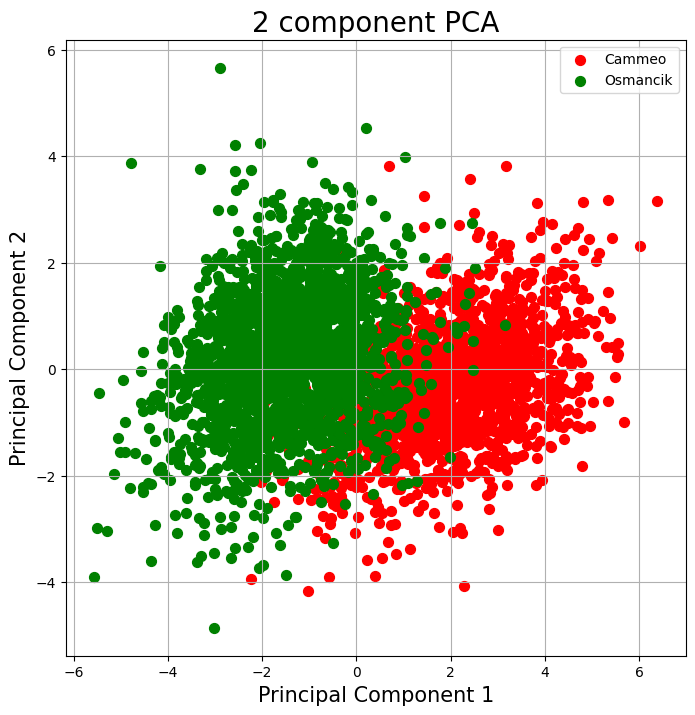

In [15]:
# Membuat objek figure dengan ukuran 8x8 inci
fig = plt.figure(figsize = (8,8))

# Menambahkan subplot ke dalam figure
ax = fig.add_subplot(1,1,1)

# Menetapkan label sumbu x
ax.set_xlabel('Principal Component 1', fontsize = 15)

# Menetapkan label sumbu y
ax.set_ylabel('Principal Component 2', fontsize = 15)

# Menetapkan label judul plot
ax.set_title('2 component PCA', fontsize = 20)

# Menentukan daftar kelas/target yaitu Rice Cammeo dan Osmancik
targets = ['Cammeo', 'Osmancik']

# Warna yang akan digunakan untuk setiap kelas/target
colors = ['r', 'g']

# Melakukan plotting untuk setiap kelas/target
for target, color in zip(targets, colors):

  # Memilih indeks yang sesuai dengan target
  indicesToKeep = finalRice['Class'] == target

  # Melakukan scatter plot untuk setiap kelas/target
  ax.scatter(finalRice.loc[indicesToKeep, 'principal component 1'],
             finalRice.loc[indicesToKeep, 'principal component 2'],
             # Menentukan warna plot
             c = color,
             # Menampilkan grid pada plot
             s = 50)

# Menambahkan legenda berdasarkan daftar kelas/target
ax.legend(targets)

# Menampilkan grid pada plot
ax.grid()

Penjelasan hasil:

Gambar tersebut menunjukkan visualisasi dari data yang sudah direduksi dimensinya menggunakan PCA. Dari plot tersebut, bisa dilihat bahwa ada dua kelompok data yang terpisah dengan baik berdasarkan kelasnya, yaitu Rice Cammeo dan Osmancik. Ini berarti bahwa PCA berhasil mengekstrak fitur-fitur yang paling penting dan relevan untuk membedakan kedua kelas tersebut.

In [16]:
# Memberikan proporsi dari total varians yang dijelaskan oleh setiap komponen utama.
pca.explained_variance_ratio_

array([0.65413989, 0.21425124])

Penjelasan hasil:
- Komponen Utama 1 (Principal Component 1) menjelaskan sekitar 65.41% dari total varians.
- Komponen Utama 2 (Principal Component 2) menjelaskan sekitar 21.43% dari total varians.

Dengan demikian, jika menggunakan dua komponen utama, dapat menjelaskan sekitar 86.84% (65.41% + 21.43%) dari total varians dalam data. Jadi, kedua komponen utama ini sudah mampu merepresentasikan sekitar 86.8% dari informasi yang terkandung dalam data asli. Ini berarti bahwa Anda bisa mengurangi dimensi data tanpa kehilangan banyak informasi.